In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df.shape

(1599, 12)

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


As per data, following are the observations :-

1) No feature has Minimum Value = 0, except Citric Acid

2) All features are not Normally Distributed, ( Theortically if feature is normally distributed, Mean = Median = Mode ).

3) All columns are numerical, hence no encoding required

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


No Null values present in any of the 12 columns.

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>],
       [<AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

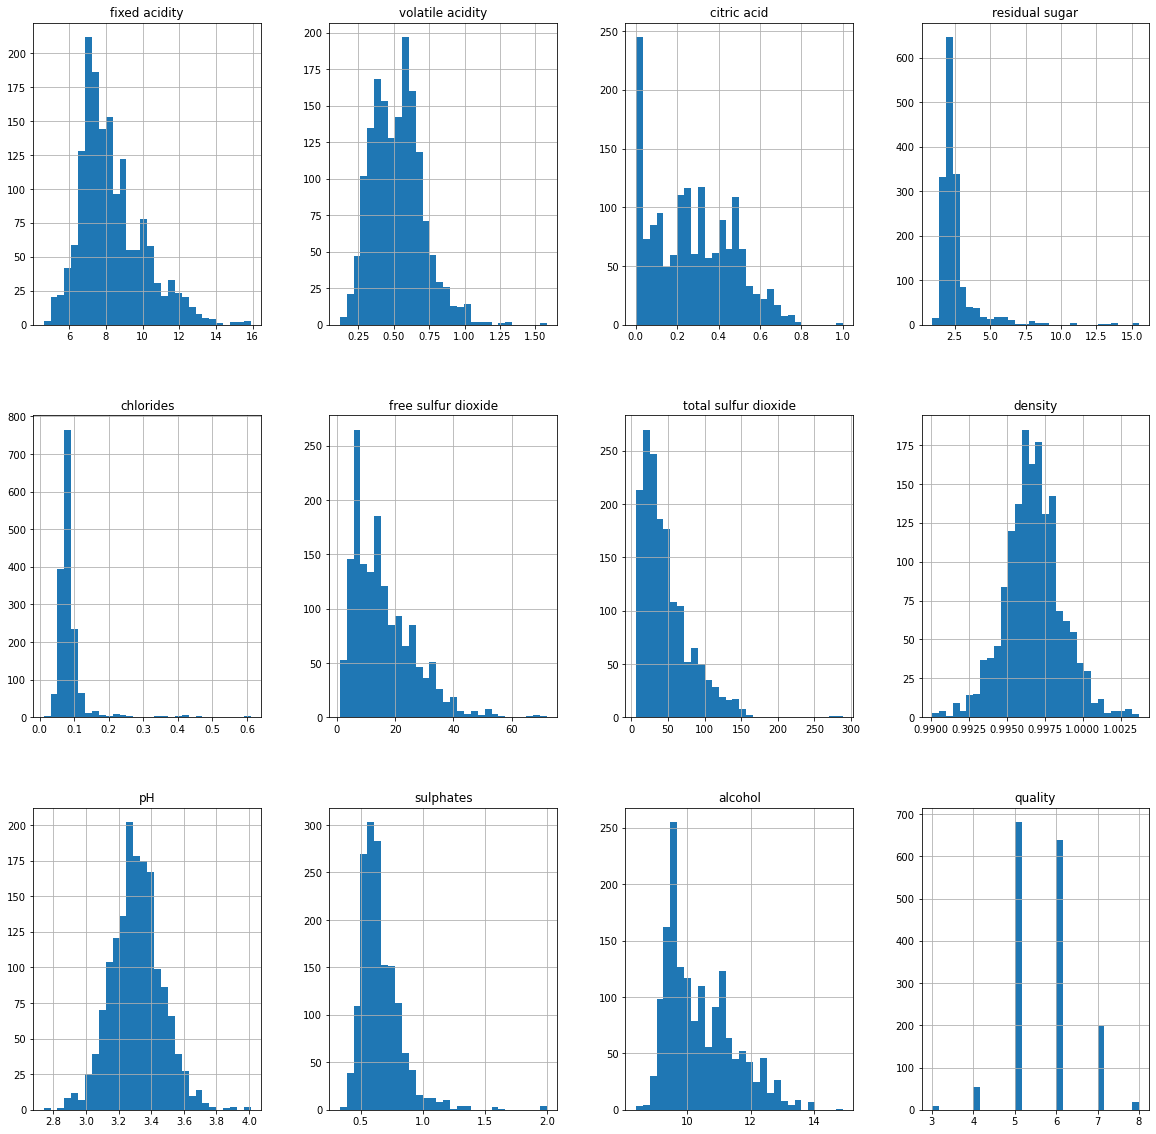

In [11]:
df.hist(figsize=(20,20), grid = True, layout = (3,4), bins = 30)

In [12]:
from scipy.stats import skew

skew_list = skew(df, nan_policy='omit')
skew_list

array([0.9818293 , 0.6709624 , 0.31803859, 4.53639479, 5.67501653,
       1.24939385, 1.51410919, 0.07122077, 0.19350176, 2.42639346,
       0.86002106, 0.21759721])

In [16]:
skew_list_df = pd.concat([pd.DataFrame(df.columns,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)
skew_list_df

,Features,Skewness
0,fixed acidity,0.981829
1,volatile acidity,0.670962
2,citric acid,0.318039
3,residual sugar,4.536395
4,chlorides,5.675017
5,free sulfur dioxide,1.249394
6,total sulfur dioxide,1.514109
7,density,0.071221
8,pH,0.193502
9,sulphates,2.426393


In [18]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Visualization of Data

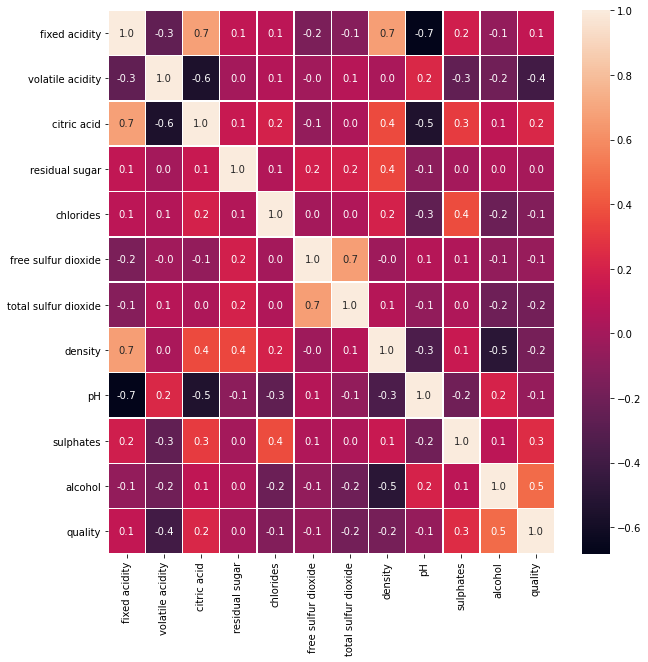

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt= '.1f',ax=ax)
plt.show()

Checking correleation between the variables using heatmap

<AxesSubplot:xlabel='quality', ylabel='count'>

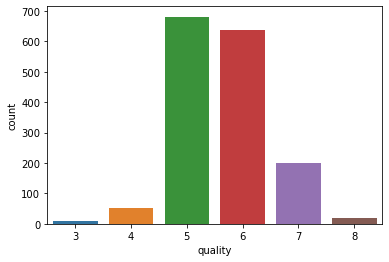

In [21]:
sns.countplot(x='quality', data=df)

Checking counts of quality using Countplot

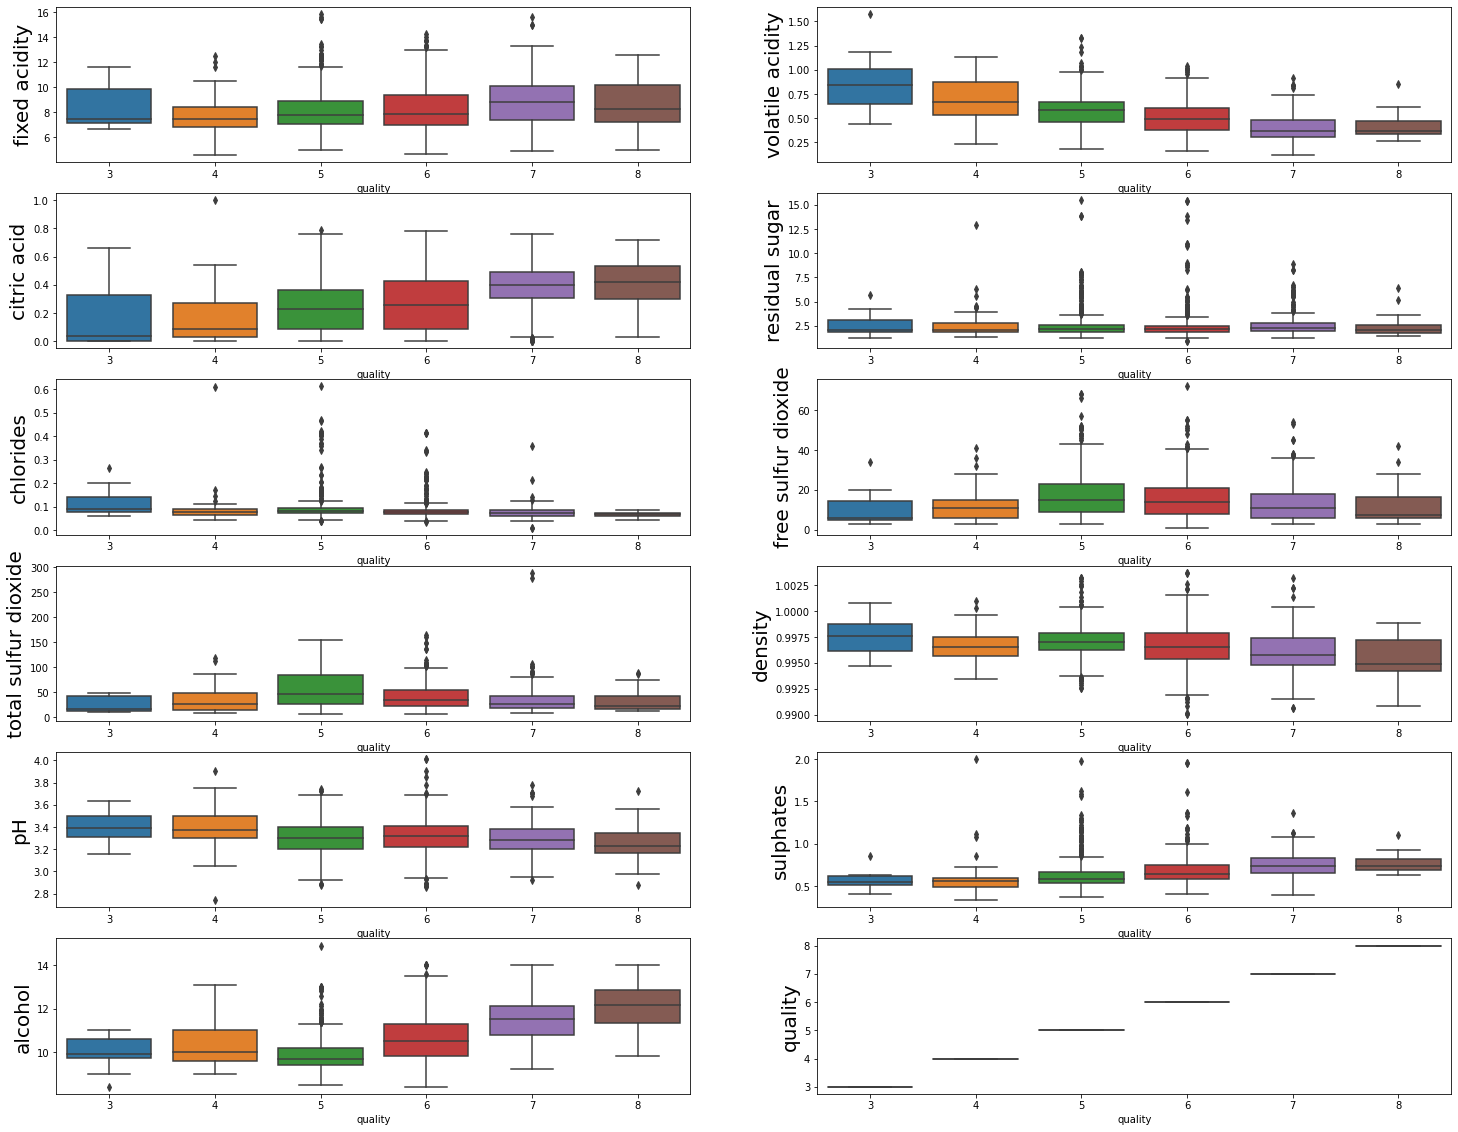

In [35]:
plt.figure( figsize = (25,20) )
plotno = 1

for column in df:
    if plotno <= 12:
        ax = plt.subplot( 6, 2, plotno )
        sns.boxplot( 'quality', df[column], data = df )
        plt.ylabel(column, fontsize = 20)
    plotno += 1

Checking boxplot to check for Outliers, Target variable is Quality, henc checking boxplot of each column against target variable.

#boxplots show many outliers for quite a few columns. Describe the dataset to get a better idea on what's happening

data.describe()

#fixed acidity - 25% - 7.1 and 50% - 7.9. Not much of a variance. Could explain the huge number of outliers

#volatile acididty - similar reasoning

#citric acid - seems to be somewhat uniformly distributed

#residual sugar - min - 0.9, max - 15!! Waaaaay too much difference. Could explain the outliers.

#chlorides - same as residual sugar. Min - 0.012, max - 0.611

#free sulfur dioxide, total suflur dioxide - same explanation as above

In [38]:
Score = []

for i in df['quality']:
    if i in (1,2,3):
        Score.append('1')
    elif i in (4,5,6,7):
        Score.append('2')
    elif i > 7:
        Score.append('3')

df['Score'] = Score
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [39]:
df['Score'].value_counts()

2    1571
3      18
1      10
Name: Score, dtype: int64

In [41]:
x = df.drop(['quality','Score'], axis = 1)
y = df['Score']

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = sc.fit_transform(x)

In [44]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(x)

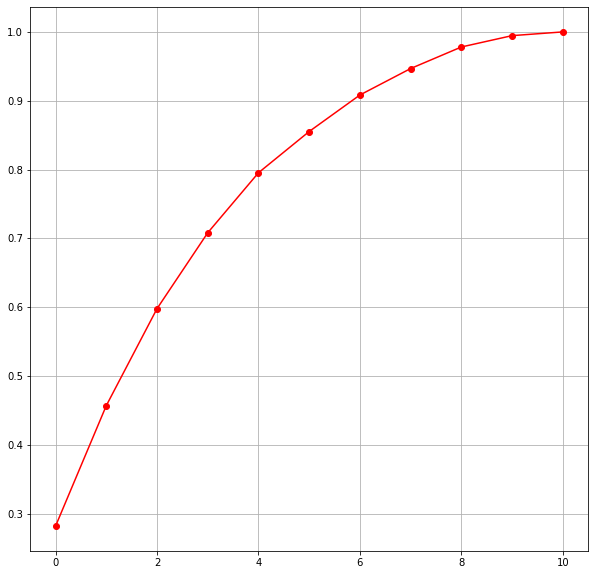

In [46]:
import numpy as np 
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

Plotting the graph to find the principal components, as per the graph, we can see that 8 principal components attribute for 90% of variation in the data. 

We shall pick the first 8 components for our prediction.

In [48]:
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)

In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25)

# Using Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

lr_cm = confusion_matrix(y_test, lr_predict)
lr_as = accuracy_score(y_test, lr_predict)

print('Logisitic Regression CM : ' , '\n', lr_cm , '\n')
print('Logisitic Regression Accuracy Score : ' , lr_as*100)

Logisitic Regression CM :  
 [[  0   2   0]
 [  0 396   0]
 [  0   2   0]] 

Logisitic Regression Accuracy Score :  99.0


99% accuracy with Logistic Regression, now we will see score with Decision Trees

# Using Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_predict = dt.predict(x_test)

dt_cm = confusion_matrix(y_test, dt_predict)
dt_as = accuracy_score(y_test, dt_predict)

print('Decision Tree Classifier CM : ' , '\n', dt_cm , '\n')
print('Decision Tree Classifier Accuracy Score : ' , dt_as*100)

Decision Tree Classifier CM :  
 [[  0   2   0]
 [  1 390   5]
 [  0   0   2]] 

Decision Tree Classifier Accuracy Score :  98.0


97.75% accuracy with Decision Tree Classifier, now we will see score with NaiveBayes

# Using NaiveBayes

In [69]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
nb_predict = nb.predict(x_test)

nb_cm = confusion_matrix(y_test, nb_predict)
nb_as = accuracy_score(y_test, nb_predict)

print('NaiveBayes CM : ' , '\n', nb_cm , '\n')
print('NaiveBayes Accuracy Score : ' , nb_as*100)

NaiveBayes CM :  
 [[  0   2   0]
 [  1 393   2]
 [  0   2   0]] 

NaiveBayes Accuracy Score :  98.25


98.25% accuracy with NaiveBayes, now we will see score with RandomForest classifier

# Using RandomForest classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_predict = rfc.predict(x_test)

rfc_cm = confusion_matrix(y_test, rfc_predict)
rfc_as = accuracy_score(y_test, rfc_predict)

print('RandomForestClassifier CM : ' , '\n', rfc_cm , '\n')
print('RandomForestClassifier Accuracy Score : ' , rfc_as*100)

RandomForestClassifier CM :  
 [[  0   2   0]
 [  0 396   0]
 [  0   1   1]] 

RandomForestClassifier Accuracy Score :  99.25


99.25% accuracy with RandomForestClassifier , greatest of all 4 models used, now we will see score with SVM classifier

# Using SVC

In [76]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
svc_predict = svc.predict(x_test)

svc_cm = confusion_matrix(y_test, svc_predict)
svc_as = accuracy_score(y_test, svc_predict)

print('SVC CM : ' , '\n', svc_cm , '\n')
print('SVC Accuracy Score : ' , svc_as*100)

SVC CM :  
 [[  0   2   0]
 [  0 396   0]
 [  0   2   0]] 

SVC Accuracy Score :  99.0


99% accuracy with SVC.

In [77]:
import pickle
filename = 'red_wine_quality.pkl'
pickle.dump(rfc, open(filename, 'wb' ))

Saving the model with RandomForestClassifier as the accuracy is greatest as compared to other models.

In [78]:
filename = 'red_wine_quality.pkl'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9925


Trying to Load the model just to check if saved model is working or not